Use this cell for all your imports

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import networkx as nx
from scipy.sparse import csr_matrix

You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

###### Note that the adjacency matrix is too big to fit in memory, that's why we used a sparse matrix instead of a dense matrix

In [7]:
with open('data.txt', 'r') as f:
    # skip the first three lines
    for _ in range(3):
        next(f)
    
    # read the data and convert to integers
    data = []
    for line in f:
        if not line.startswith('#'):
            from_node, to_node = map(int, line.strip().split())
            data.append((from_node, to_node))

Use this cell to normalize the matrix as you see fit.

In [10]:
n_nodes = np.max(data)  # assumes that node IDs start at 1 and are consecutive integers
row, col = np.array(data).T - 1  # convert to 0-based indexing
adjacency_matrix = csr_matrix((np.ones(len(data)), (row, col)), shape=(n_nodes, n_nodes))

Apply the PageRank algorithm to the matrix you created.

In [11]:
edges = [(pair[0], pair[1]) for pair in data]

graph = nx.DiGraph()
graph.add_edges_from(edges)

pagerank_scores = nx.pagerank(graph)

top_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]
for node, score in top_nodes:
    print(f"Node: {node}, Score: {score:.6f}")

Node: 9407087, Score: 0.006239
Node: 9503124, Score: 0.004633
Node: 9510017, Score: 0.004385
Node: 9402044, Score: 0.003935
Node: 9711200, Score: 0.003410
Node: 9410167, Score: 0.003407
Node: 9408099, Score: 0.003190
Node: 9207016, Score: 0.003114
Node: 9402002, Score: 0.002962
Node: 9610043, Score: 0.002753


Output a list of the 100 most important papers along with their importance

In [19]:
import operator

# Run PageRank algorithm
pr = nx.pagerank(graph)

# Sort dictionary by value in descending order
sorted_pr = sorted(pr.items(), key=operator.itemgetter(1), reverse=True)

# Print top 100 paper IDs and PageRank scores
for i, (node, score) in enumerate(sorted_pr[:100]):
    print(f"Paper ID: {node}\tScore: {score}")

    if i == 99:
        break

Paper ID: 9407087	Score: 0.006238910935211816
Paper ID: 9503124	Score: 0.004632588508880583
Paper ID: 9510017	Score: 0.004385169336798882
Paper ID: 9402044	Score: 0.003935347334410061
Paper ID: 9711200	Score: 0.003409682539237107
Paper ID: 9410167	Score: 0.003407370515336672
Paper ID: 9408099	Score: 0.003189869048538741
Paper ID: 9207016	Score: 0.0031138613638518916
Paper ID: 9402002	Score: 0.002962458707729362
Paper ID: 9610043	Score: 0.002752903011864363
Paper ID: 9205068	Score: 0.0026620045653103306
Paper ID: 9510135	Score: 0.0025914346362725235
Paper ID: 9201015	Score: 0.002554349977912874
Paper ID: 9205027	Score: 0.0024590344235207247
Paper ID: 9304154	Score: 0.0023325190702325432
Paper ID: 9802150	Score: 0.002255515474336809
Paper ID: 9401139	Score: 0.002245953898458351
Paper ID: 9504090	Score: 0.0021065021774172212
Paper ID: 9802109	Score: 0.0020708807846539345
Paper ID: 208020	Score: 0.002068525647306938
Paper ID: 9305185	Score: 0.002040554603308644
Paper ID: 9207053	Score: 0.0

Visualize your results

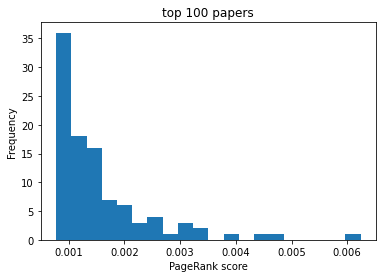

In [21]:
pagerank_scores = nx.pagerank(graph)

top_papers = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:100]
scores = [score for paper, score in top_papers]


plt.hist(scores, bins=20)
plt.xlabel('PageRank score')
plt.ylabel('Frequency')
plt.title('top 100 papers')
plt.show()